In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv


# Importing Libraries and Setting Up the Notebook

In [10]:
! pip install h2o
! pip install yellowbrick
! pip install requests
! pip install tabulate
! pip install "colorama>=0.3.8"
! pip install future
! pip install shap
! pip install datasist

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [11]:
import h2o
from h2o.automl import H2OAutoML
import random
import os
import sys
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

# Initialize H2O cluster
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu220.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu220.04.1, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpagi0nak_
  JVM stdout: /tmp/tmpagi0nak_/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpagi0nak_/h2o_unknownUser_started_from_python.err


/opt/conda/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_unknownUser_ybcf6h
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.500 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


# Data Exploration and Cleaning

In [12]:
#Reading data into pandas dataframe.

data_sets = "/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv"
data = pd.read_csv(data_sets)

In [13]:
# Displaying first rows of dataset
data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274093 entries, 0 to 274092
Columns: 786 entries, names to 784
dtypes: float64(784), object(2)
memory usage: 1.6+ GB


,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
count,274093.0,274093.0,274093.0,274093.0,274093.0,274093.0,274093.000000,274093.000000,274093.000000,274093.000000,...,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,0.000011,0.001043,0.001518,...,0.002638,0.001562,0.001131,0.000894,0.000489,0.000317,0.000204,0.000033,0.000033,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.001910,0.004271,0.475743,0.494410,...,0.320080,0.179093,0.150590,0.189578,0.083345,0.067396,0.053345,0.012813,0.012813,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2.000000,248.000000,245.000000,...,103.000000,59.000000,41.000000,88.000000,21.000000,20.000000,19.000000,6.000000,6.000000,0.0


In [14]:
#Dataset Characteristics
print(f"The Shape of the Dataset is: {data.shape}")
print(f"Number of Samples: {data.shape[0]}")
print(f"Number of Features: {data.shape[1]}")

The Shape of the Dataset is: (274093, 786)
Number of Samples: 274093
Number of Features: 786


# Creating the model

In [15]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Initialize and fit the label encoder
label_encoder = LabelEncoder()
label_encoder.fit(data['labels'])  # Fit the encoder with your labels

# Now you can transform your labels to integers safely
y_integers = label_encoder.transform(data['labels'])

# Convert these integer labels to one-hot encoded vectors
y = to_categorical(y_integers)

# Continue with your preprocessing
X = data.iloc[:, 2:].values
X = X.reshape((-1, 28, 28, 1)).astype('float32') / 255

# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit the label encoder to your labels
label_encoder.fit(data['labels'])

# Transform labels to integers
y_integers = label_encoder.transform(data['labels'])

# Now you can convert these integer labels to one-hot encoding
y = to_categorical(y_integers)


In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Step 1: Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer size based on the number of classes
])

# Step 2: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary to check the structure
model.summary()

# Step 3: Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Step 4: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 94)             │         6,110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,782 (385.87 KB)

 Trainable params: 98,782 (385.87 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 134s 19ms/step - accuracy: 0.7570 - loss: 0.9133 - val_accuracy: 0.9059 - val_loss: 0.3133
Epoch 2/10
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 139s 19ms/step - accuracy: 0.9137 - loss: 0.2743 - val_accuracy: 0.9208 - val_loss: 0.2618
Epoch 3/10
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 140s 19ms/step - accuracy: 0.9284 - loss: 0.2213 - val_accuracy: 0.9278 - val_loss: 0.2323
Epoch 4/10
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 141s 18ms/step - accuracy: 0.9359 - loss: 0.1936 - val_accuracy: 0.9243 - val_loss: 0.2384
Epoch 5/10
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 141s 18ms/step - accuracy: 0.9407 - loss: 0.1742 - val_accuracy: 0.9305 - val_loss: 0.2211
Epoch 6/10
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 143s 19ms/step - accuracy: 0.9442 - loss: 0.1608 - val_accuracy: 0.9301 - val_loss: 0.2328
Epoch 7/10
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 141s 18ms/step - accuracy: 0.9471 - loss: 0.1512 - val_accuracy: 0.9360 - val_loss: 0.2129
Epoch 8/10
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 144s 19ms/step - accuracy: 

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf

# Assuming the input shape parameters and the number of classes
Length, Height, RGB, NCl = 28, 28, 1, 94

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(Length, Height, RGB)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    
    Dense(64, activation='relu'),
    Dense(NCl, activation='softmax')  # Adjusted for 94 classes
])

model.summary()

# Model compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=5),
    ModelCheckpoint(filepath='simpler_best_model.keras', monitor='val_accuracy', save_best_only=True)
]

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=callbacks_list)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 94)             │         6,110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,782 (385.87 KB)

 Trainable params: 98,782 (385.87 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 86s 31ms/step - accuracy: 0.7010 - loss: 1.1642 - val_accuracy: 0.8779 - val_loss: 0.3873
Epoch 2/20
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 142s 31ms/step - accuracy: 0.8953 - loss: 0.3356 - val_accuracy: 0.9026 - val_loss: 0.3084
Epoch 3/20
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 85s 31ms/step - accuracy: 0.9155 - loss: 0.2645 - val_accuracy: 0.9183 - val_loss: 0.2647
Epoch 4/20
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 141s 31ms/step - accuracy: 0.9268 - loss: 0.2256 - val_accuracy: 0.9235 - val_loss: 0.2487
Epoch 5/20
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 140s 30ms/step - accuracy: 0.9335 - loss: 0.2005 - val_accuracy: 0.9218 - val_loss: 0.2474
Epoch 6/20
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9383 - loss: 0.1837 - val_accuracy: 0.9301 - val_loss: 0.2305
Epoch 7/20
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 142s 31ms/step - accuracy: 0.9418 - loss: 0.1693 - val_accuracy: 0.9295 - val_loss: 0.2264
Epoch 8/20
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 141s 30ms/step - accuracy: 0.9

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model definition (make sure this matches your model's architecture)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(94, activation='softmax')  # Assuming you have 94 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Assuming callbacks_list is defined as before
callbacks_list = [ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)]

# Fit the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=callbacks_list
)


Epoch 1/100
3427/3427 ━━━━━━━━━━━━━━━━━━━━ 103s 29ms/step - accuracy: 0.7255 - loss: 1.0597 - val_accuracy: 0.8913 - val_loss: 0.3493 - learning_rate: 0.0010
Epoch 2/100
3427/3427 ━━━━━━━━━━━━━━━━━━━━ 143s 30ms/step - accuracy: 0.9039 - loss: 0.3042 - val_accuracy: 0.9176 - val_loss: 0.2700 - learning_rate: 0.0010
Epoch 3/100
3427/3427 ━━━━━━━━━━━━━━━━━━━━ 140s 29ms/step - accuracy: 0.9224 - loss: 0.2405 - val_accuracy: 0.9179 - val_loss: 0.2615 - learning_rate: 0.0010
Epoch 4/100
3427/3427 ━━━━━━━━━━━━━━━━━━━━ 144s 30ms/step - accuracy: 0.9307 - loss: 0.2092 - val_accuracy: 0.9271 - val_loss: 0.2388 - learning_rate: 0.0010
Epoch 5/100
3427/3427 ━━━━━━━━━━━━━━━━━━━━ 140s 29ms/step - accuracy: 0.9378 - loss: 0.1849 - val_accuracy: 0.9312 - val_loss: 0.2241 - learning_rate: 0.0010
Epoch 6/100
3427/3427 ━━━━━━━━━━━━━━━━━━━━ 100s 29ms/step - accuracy: 0.9431 - loss: 0.1680 - val_accuracy: 0.9336 - val_loss: 0.2183 - learning_rate: 0.0010
Epoch 7/100
3427/3427 ━━━━━━━━━━━━━━━━━━━━ 101s 30ms

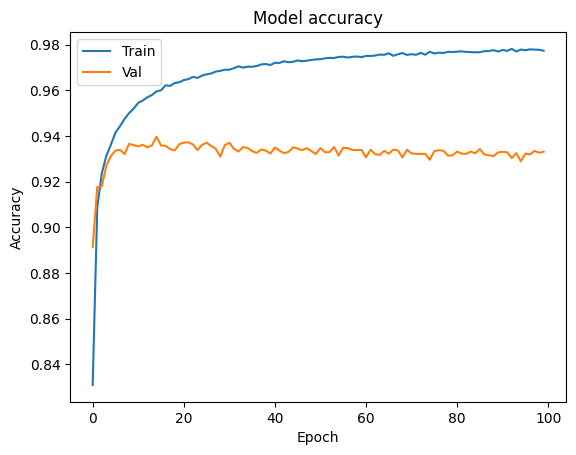

Final Training Accuracy: 97.73%
Final Validation Accuracy: 93.31%


In [42]:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Optionally, print the final accuracy values
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {final_train_accuracy*100:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy*100:.2f}%")


In [53]:
# Optionally, print the final accuracy values
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {final_train_accuracy*100:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy*100:.2f}%")

Final Training Accuracy: 97.73%
Final Validation Accuracy: 93.31%


In [52]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

857/857 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.0108 - loss: nan
Test Accuracy: 1.10%
